# Alucar - Analisando as vendas

In [82]:
import pandas as pd

In [83]:
pd.read_csv('dados/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [84]:
alucar = pd.read_csv('dados/alucar.csv')

In [85]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [86]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [87]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [88]:
alucar['mes'] = pd.to_datetime(alucar.mes)

In [89]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [90]:
!pip3 install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

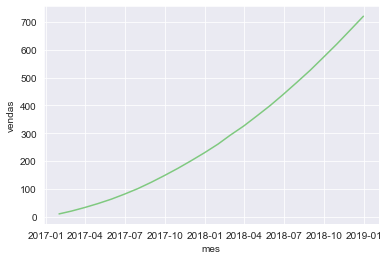

In [91]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

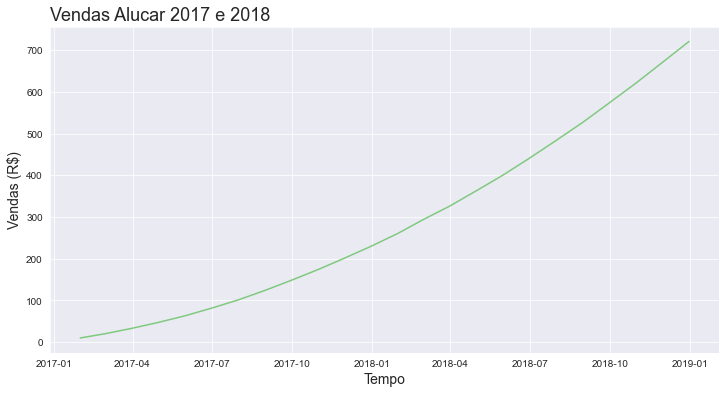

In [92]:
sns.set_palette('Accent') #Setando uma paleta de cor
sns.set_style('darkgrid') #Setando uma grid line
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar) #Plotando o gráfico
ax.figure.set_size_inches(12, 6) #Definindo o tamanho do gráfico
ax.set_title('Vendas Alucar 2017 e 2018', loc = 'left', fontsize = 18) #Definindo um titulo
ax.set_xlabel('Tempo', fontsize = 14) #Definindo a legenda do eixo x
ax.set_ylabel('Vendas (R$)', fontsize = 14) #Definindo a legenda do eixo y
ax = ax #Atribuindo ax a ax para ocultar informações desnecessárias

In [93]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


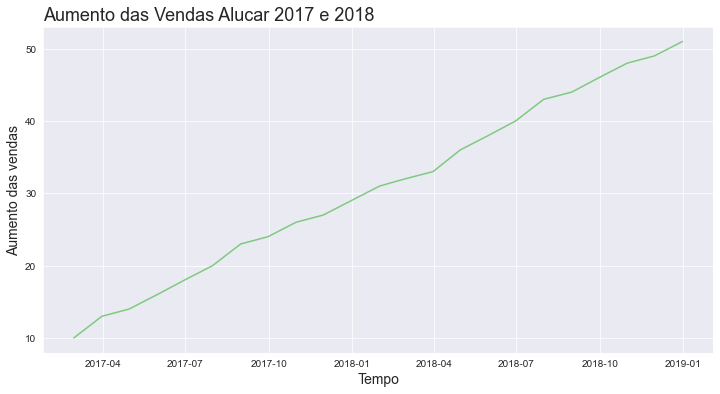

In [94]:
sns.set_palette('Accent') #Setando uma paleta de cor
sns.set_style('darkgrid') #Setando uma grid line
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar) #Plotando o gráfico
ax.figure.set_size_inches(12, 6) #Definindo o tamanho do gráfico
ax.set_title('Aumento das Vendas Alucar 2017 e 2018', loc = 'left', fontsize = 18) #Definindo um titulo
ax.set_xlabel('Tempo', fontsize = 14) #Definindo a legenda do eixo x
ax.set_ylabel('Aumento das vendas', fontsize = 14) #Definindo a legenda do eixo y
ax = ax #Atribuindo ax a ax para ocultar informações desnecessárias

In [95]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

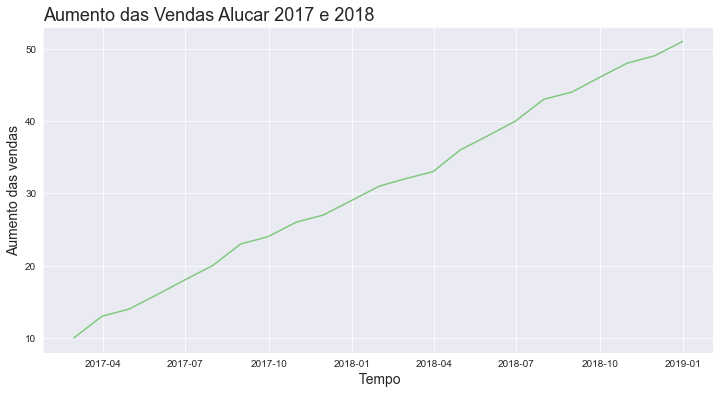

In [96]:
plotar('Aumento das Vendas Alucar 2017 e 2018', ' Tempo', 'Aumento das vendas', 'mes', 'aumento', alucar)

In [97]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


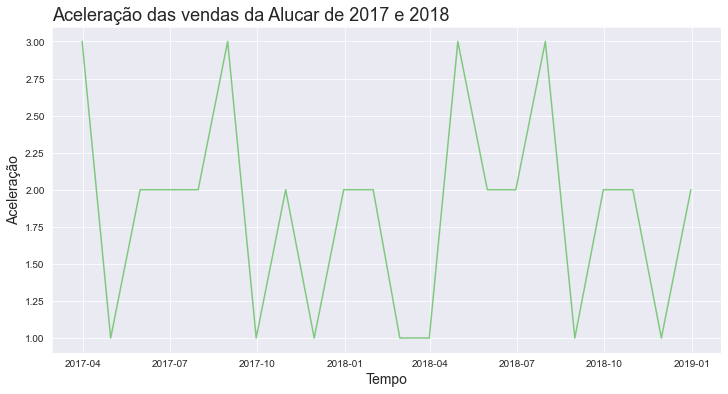

In [98]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

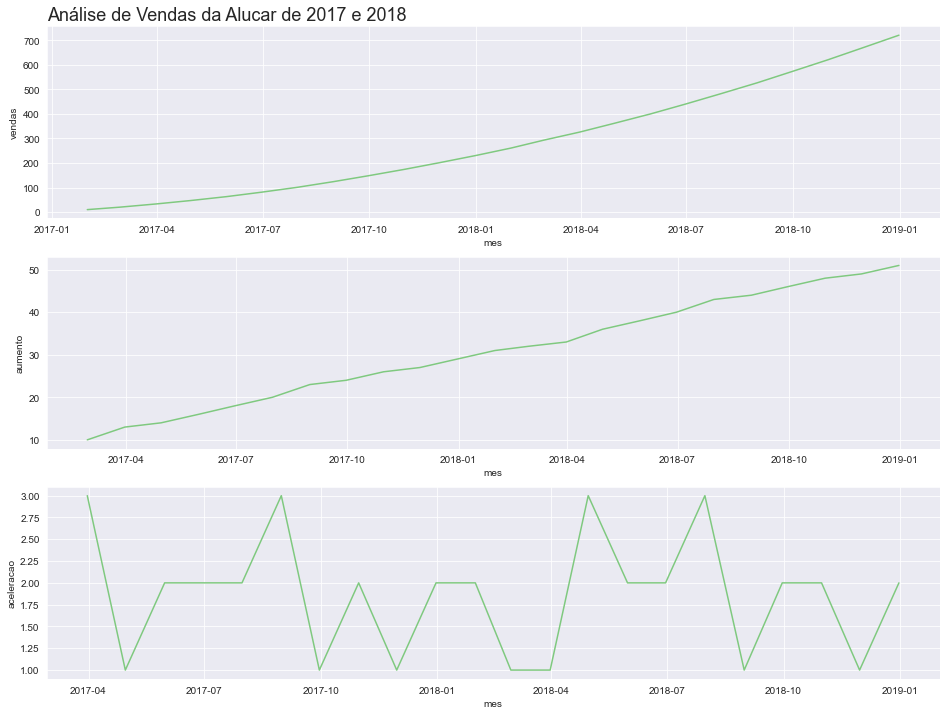

In [99]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [100]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

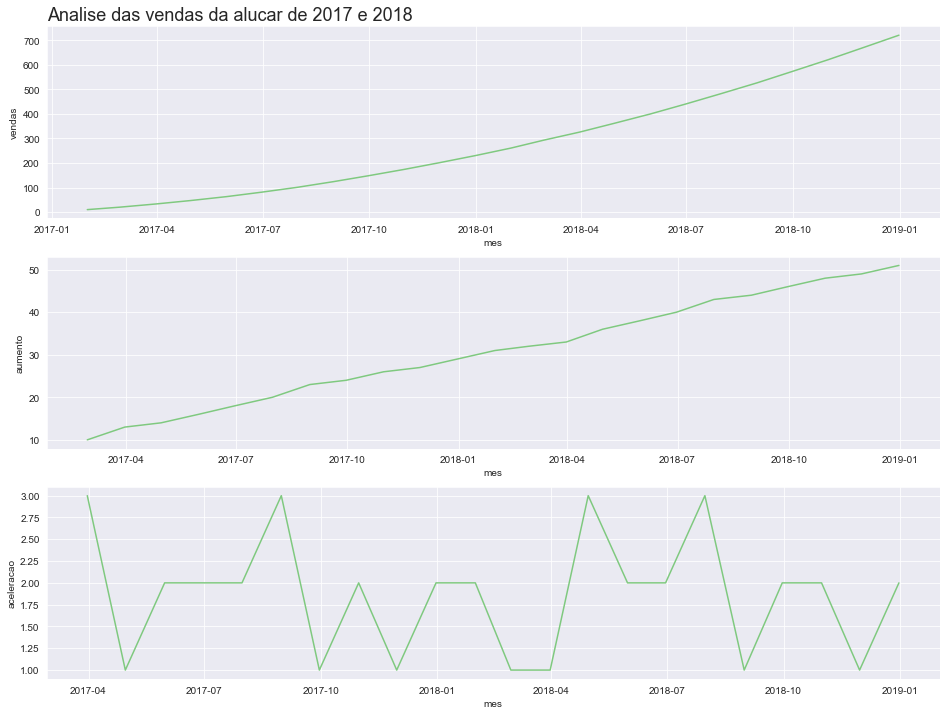

In [101]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Analise das vendas da alucar de 2017 e 2018')

In [102]:
from pandas.plotting import autocorrelation_plot

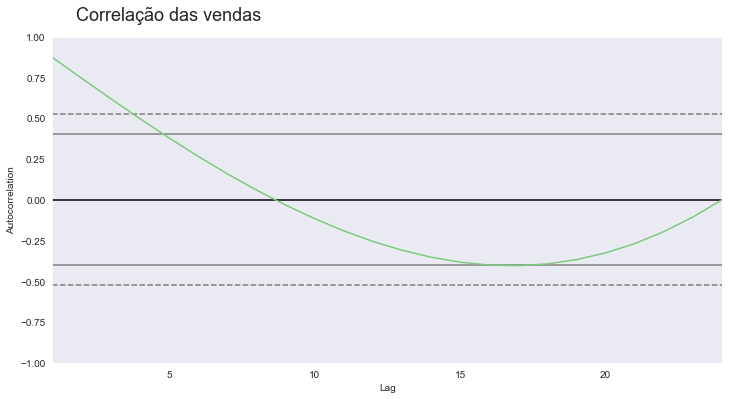

In [103]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

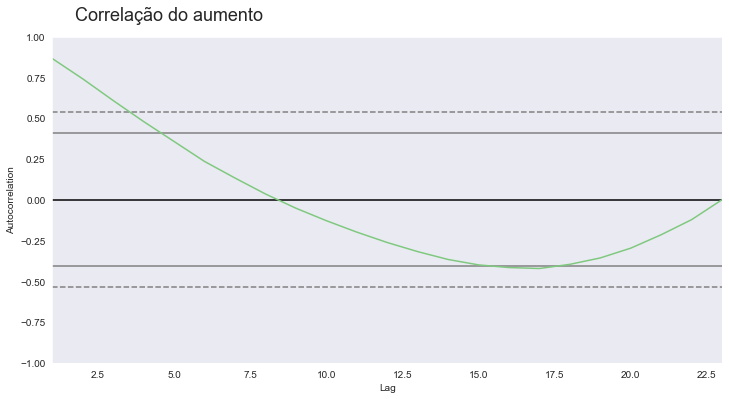

In [104]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

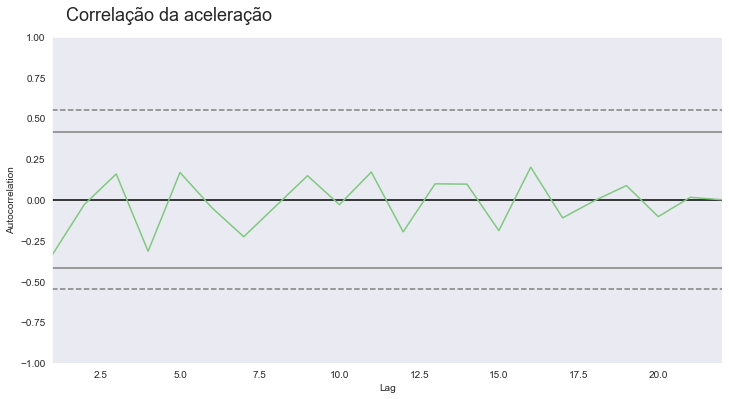

In [105]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [106]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [107]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [108]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [109]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [110]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


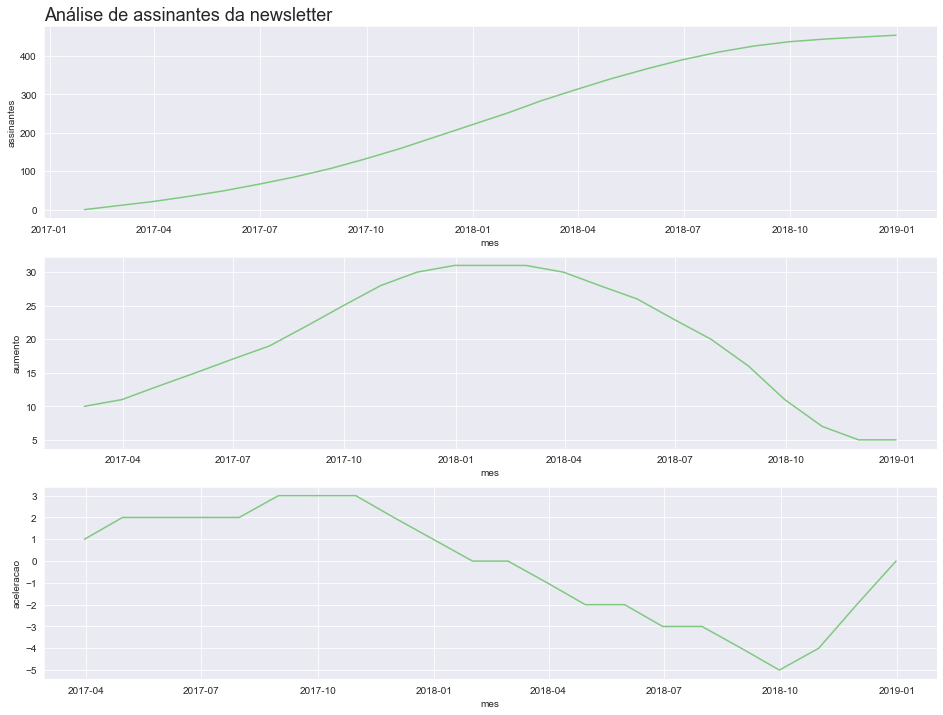

In [111]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [112]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [113]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [114]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [115]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [116]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


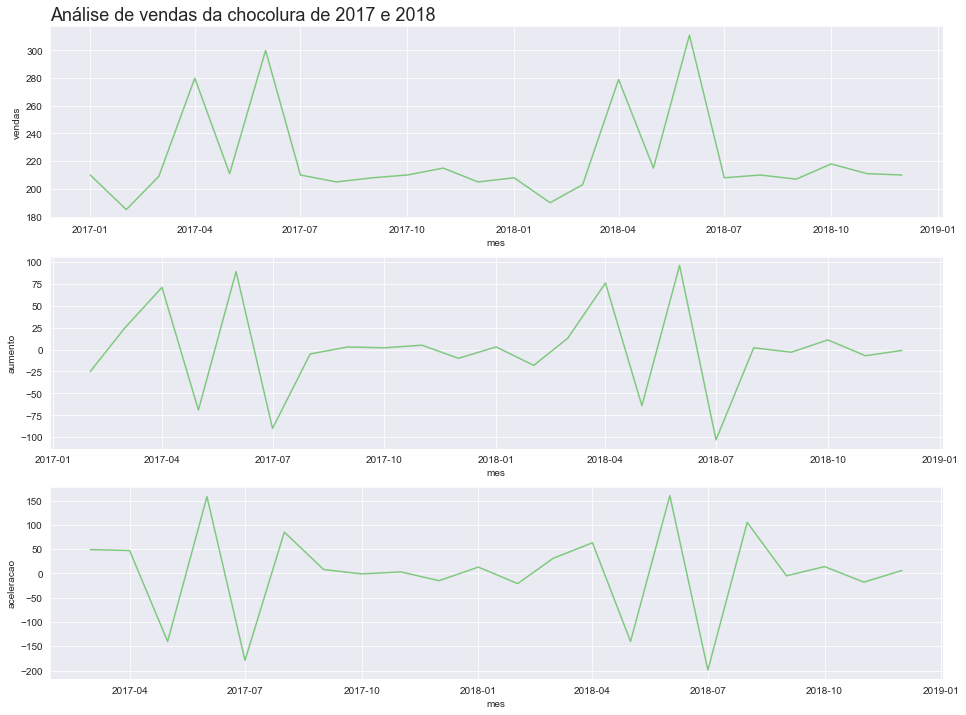

In [117]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da chocolura de 2017 e 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [118]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [119]:
print('quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

quantidade de linhas e colunas:  (61, 2)
quantidade de dados nulos:  0


In [120]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [121]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [122]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head(10)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
5,2018-10-06,18,-33.0,-34.0
6,2018-10-07,20,2.0,35.0
7,2018-10-08,50,30.0,28.0
8,2018-10-09,53,3.0,-27.0
9,2018-10-10,56,3.0,0.0


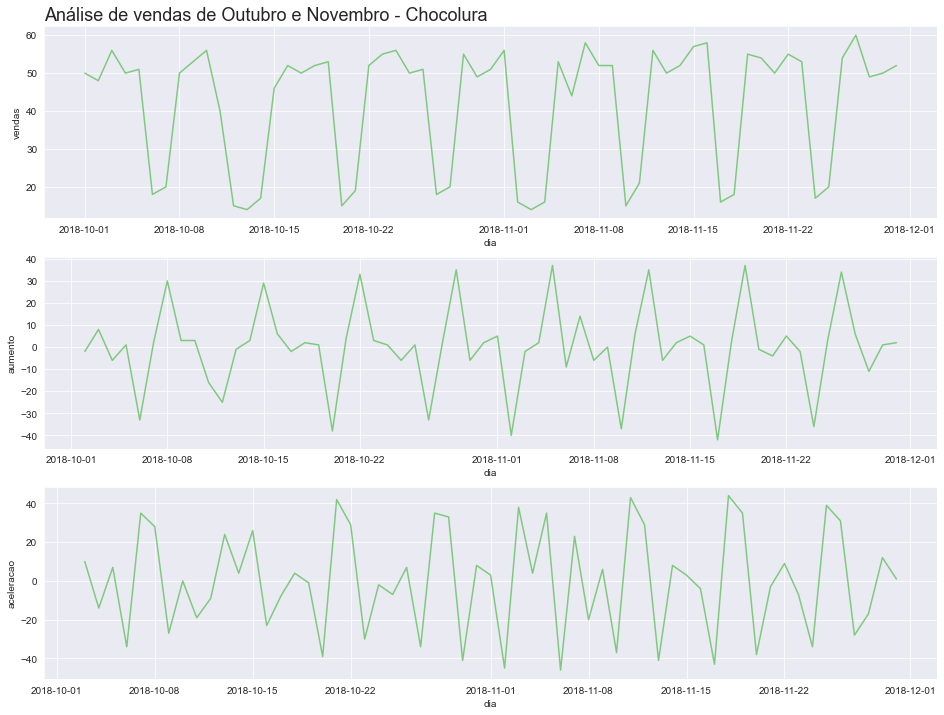

In [123]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

## Analisando a sazonalidade

In [124]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [125]:
vendas_por_dia.sample(10)

,dia,vendas,aumento,aceleracao,dia_da_semana
44,2018-11-14,52,2.0,8.0,Wednesday
57,2018-11-27,60,6.0,-28.0,Tuesday
53,2018-11-23,53,-2.0,-7.0,Friday
36,2018-11-06,44,-9.0,-46.0,Tuesday
38,2018-11-08,52,-6.0,-20.0,Thursday
5,2018-10-06,18,-33.0,-34.0,Saturday
7,2018-10-08,50,30.0,28.0,Monday
16,2018-10-17,50,-2.0,-8.0,Wednesday
4,2018-10-05,51,1.0,7.0,Friday
42,2018-11-12,56,35.0,29.0,Monday


In [126]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [127]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado',
       'Sunday': 'Domingo'}

In [128]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [129]:
vendas_por_dia.sample(10)

,dia,vendas,aumento,aceleracao,dia_da_semana
7,2018-10-08,50,30.0,28.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terça
38,2018-11-08,52,-6.0,-20.0,Quinta
1,2018-10-02,48,-2.0,NaN,Terça
52,2018-11-22,55,5.0,9.0,Quinta
3,2018-10-04,50,-6.0,-14.0,Quinta
56,2018-11-26,54,34.0,31.0,Segunda
13,2018-10-14,17,3.0,4.0,Domingo
48,2018-11-18,18,2.0,44.0,Domingo
60,2018-11-30,52,2.0,1.0,Sexta


## Agrupando os dias

In [130]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [131]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Correlação das vendas diárias

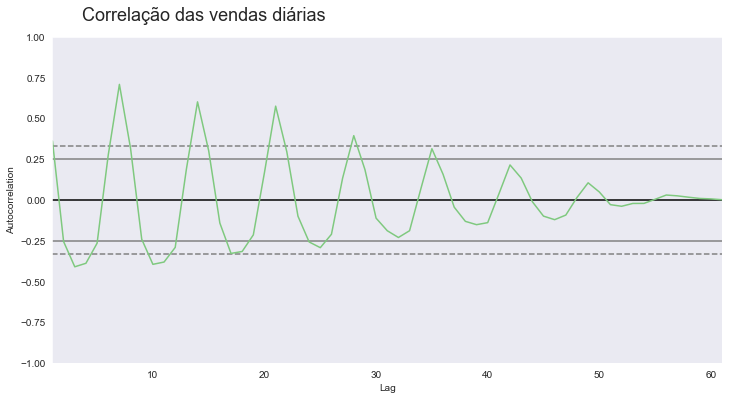

In [132]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

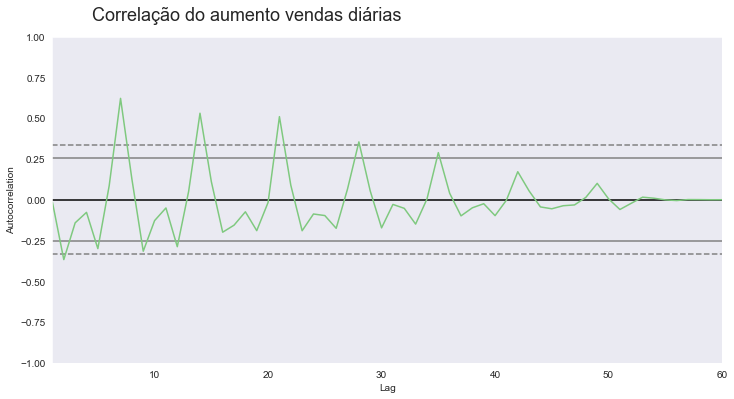

In [133]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento vendas diárias', fontsize = 18, x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

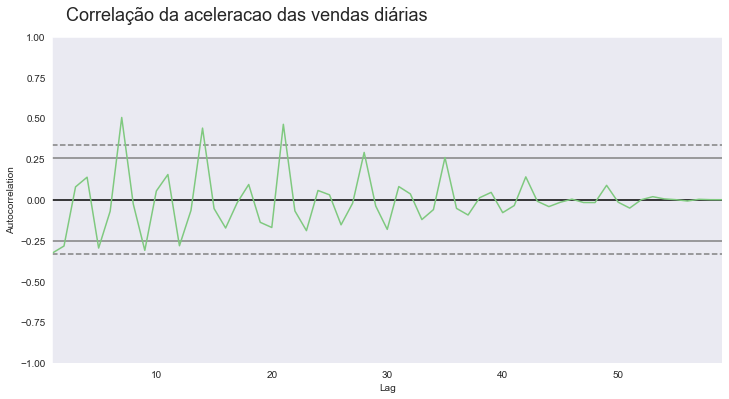

In [134]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleracao das vendas diárias', fontsize = 18, x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [135]:
cafelura = pd.read_csv('dados/cafelura.csv')

In [136]:
cafelura.head(10)

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


In [137]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [138]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [139]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [140]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


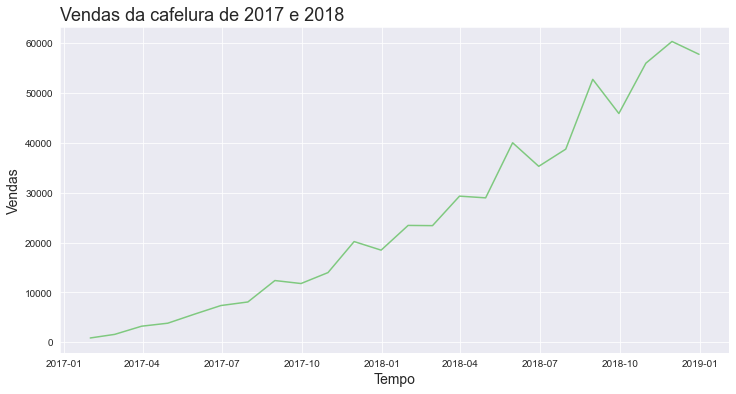

In [141]:
plotar('Vendas da cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [142]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [143]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [144]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head(10)

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


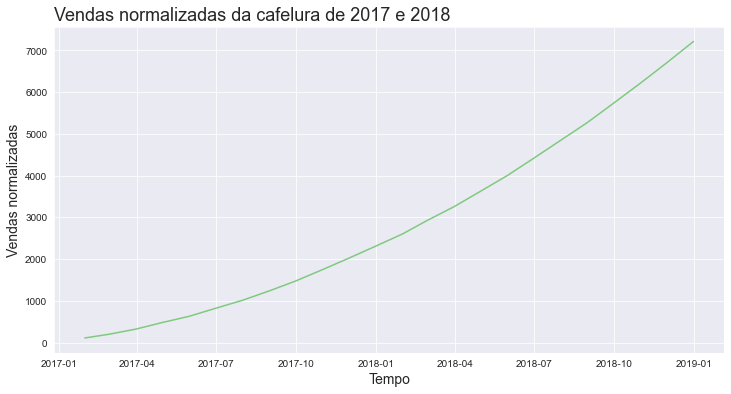

In [145]:
plotar('Vendas normalizadas da cafelura de 2017 e 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

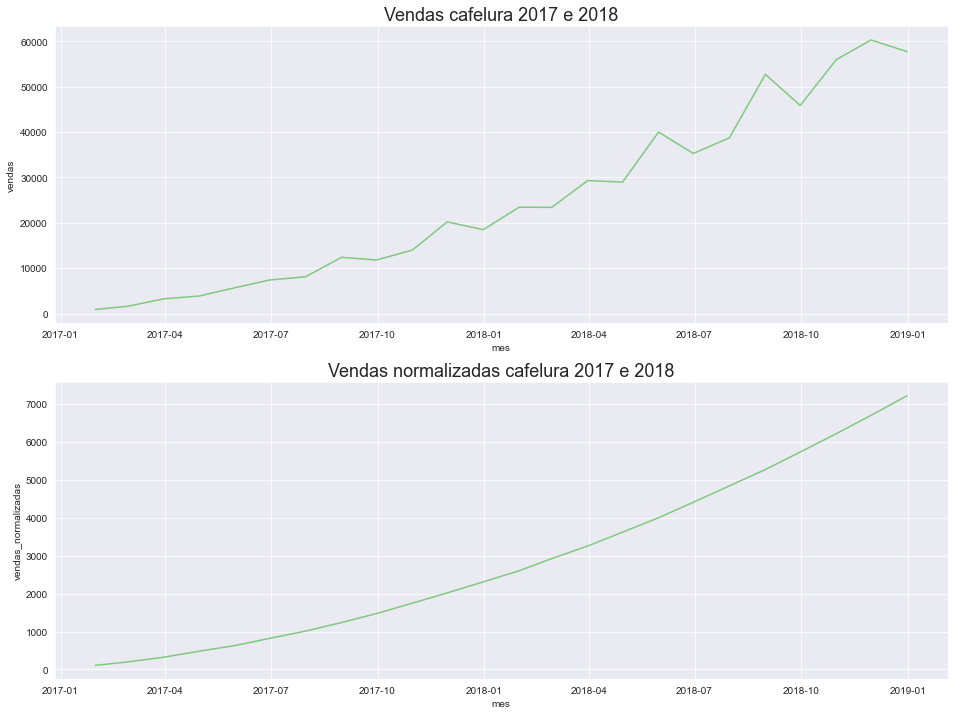

In [146]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

# Statsmodels

In [147]:
!pip3 install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

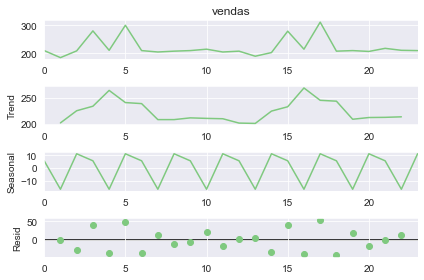

In [154]:
resultado = seasonal_decompose(chocolura['vendas'], period = 3)
ax = resultado.plot()

In [155]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [156]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head(10)

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508
5,300.0,240.333333,11.126984,48.539683
6,210.0,238.333333,5.603175,-33.936508
7,205.0,207.666667,-16.730159,14.063492
8,208.0,207.666667,11.126984,-10.793651
9,210.0,211.000000,5.603175,-6.603175


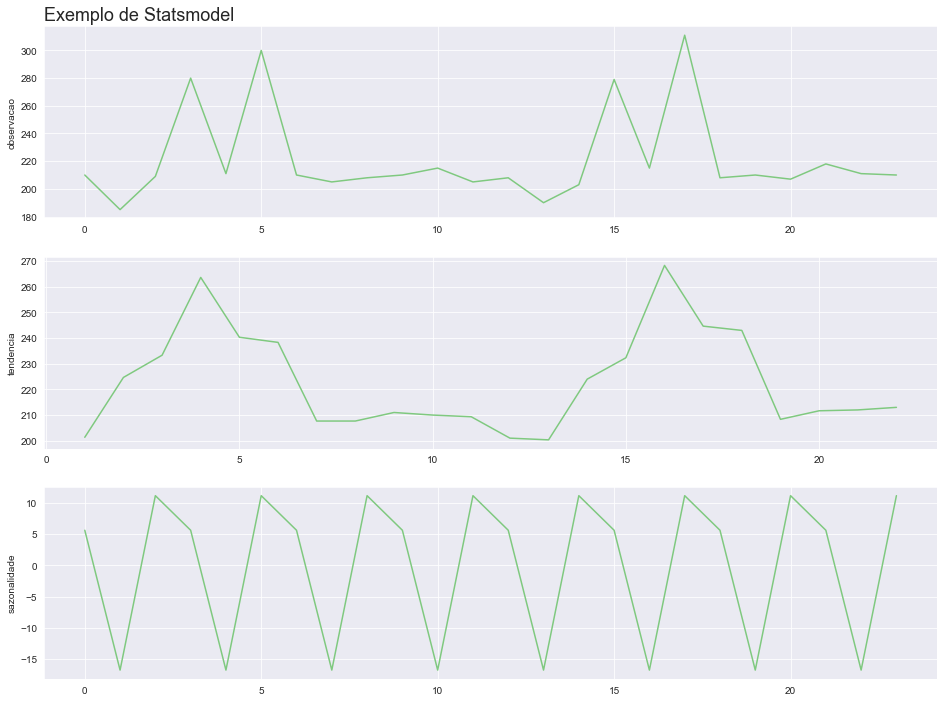

In [158]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodel')

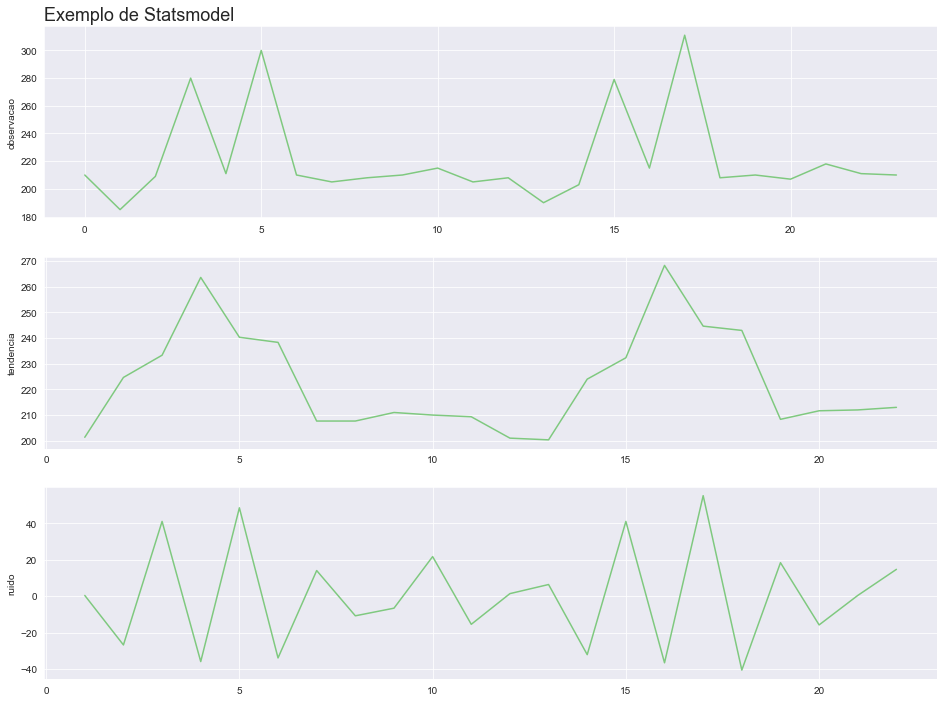

In [159]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodel')

# Alucel - Análise de vendas

In [161]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head(10)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
5,2018-10-06,2005.89
6,2018-10-07,3793.07
7,2018-10-08,2039.59
8,2018-10-09,3365.58
9,2018-10-10,2616.12


In [162]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [164]:
alucel['dia'] = pd.to_datetime(alucel.dia)
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [165]:
print('quantidade de linhas e colunas: ', alucel.shape)
print('quantidade de dados nulos: ', alucel.isna().sum().sum())

quantidade de linhas e colunas:  (61, 2)
quantidade de dados nulos:  0


In [167]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head(10)

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
5,2018-10-06,2005.89,59.72,52.57
6,2018-10-07,3793.07,1787.18,1727.46
7,2018-10-08,2039.59,-1753.48,-3540.66
8,2018-10-09,3365.58,1325.99,3079.47
9,2018-10-10,2616.12,-749.46,-2075.45


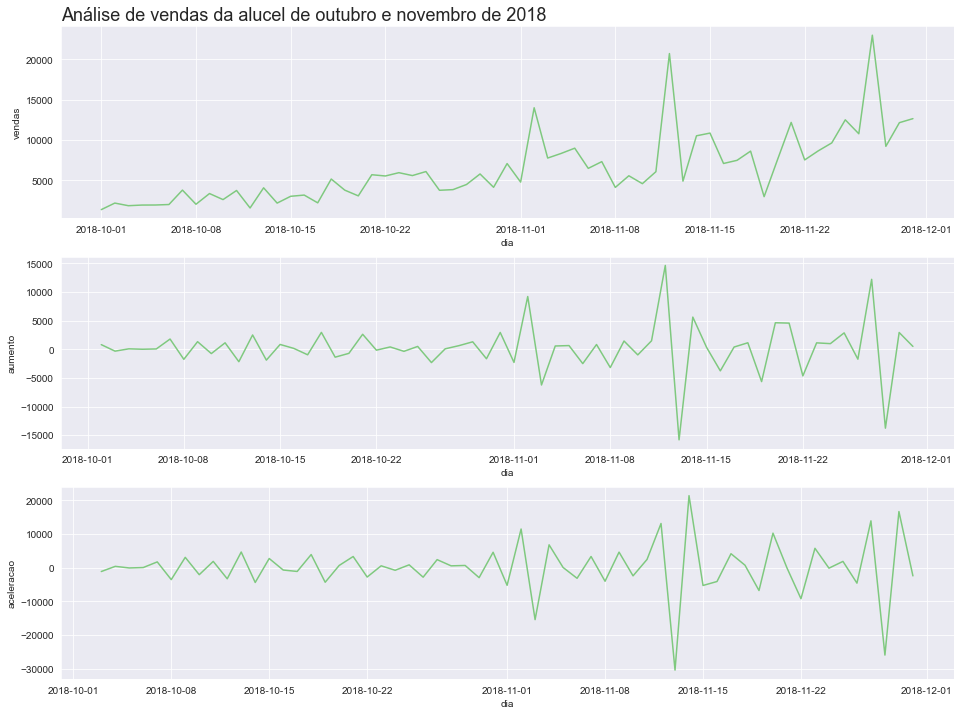

In [168]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da alucel de outubro e novembro de 2018')

In [169]:
## Média móvel

In [170]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [172]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


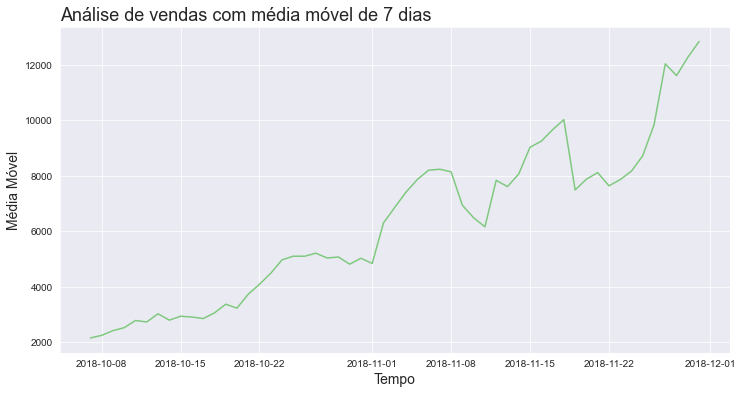

In [173]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

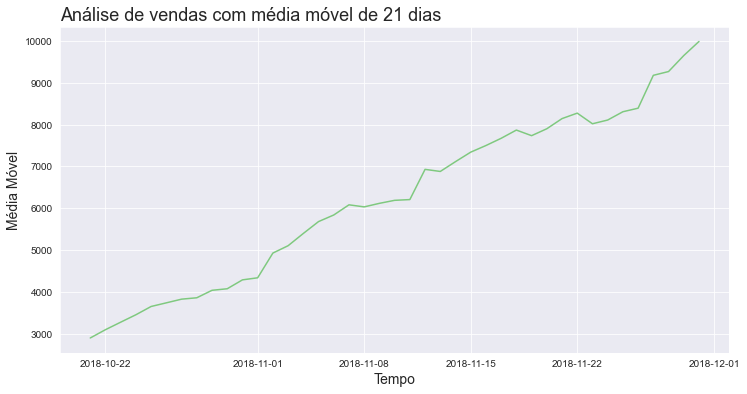

In [174]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

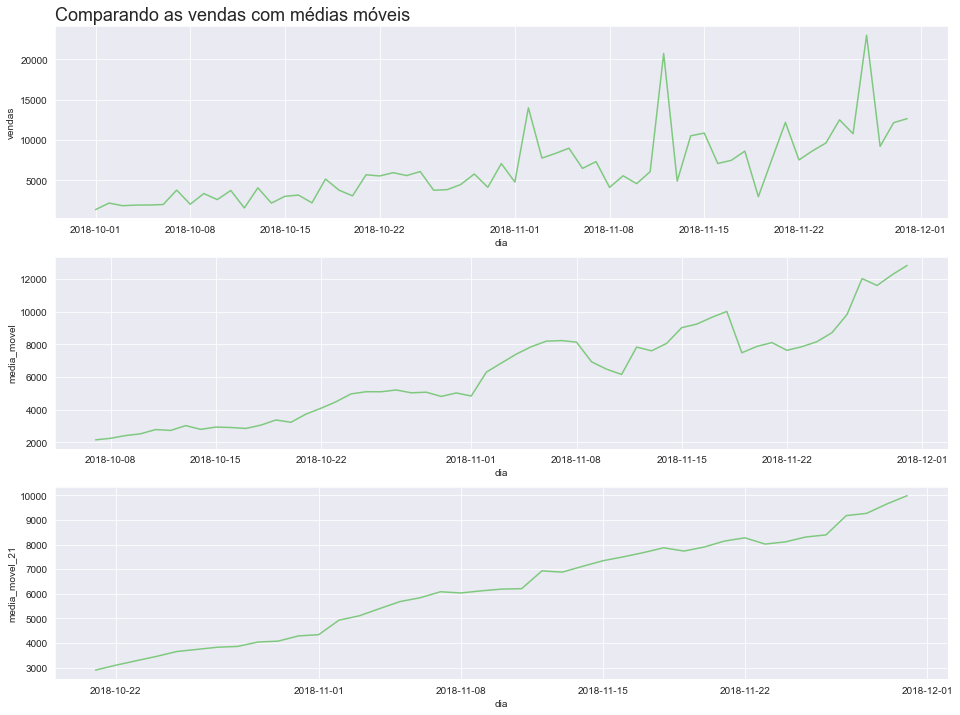

In [175]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias móveis')